Creating test scene with one light source and one primitive

In [1]:
from sightpy import *
from sightpy.quantum import *

In [2]:
scene = Scene(ambient_color=rgb(0.05, 0.05, 0.05), use_quantum_raytracing=False)

quantum_config = QTraceConfig(
        use_image_coherence=True,
        use_termination_criterion=True,
        max_iterations=1,
        shots_per_search=512,
        debug=False  # Set to True for detailed logging
    )

scene.enable_quantum_raytracing(quantum_config)

scene.add_Camera(
        screen_width=32,
        screen_height=32,
        look_from = vec3(278, 278, 800),
        look_at = vec3(278,278,0), 
		focal_distance= 1.,
        field_of_view= 40
    )

red_diffuse = Diffuse(diff_color = rgb(.65, .05, .05))
emissive_white = Emissive(color = rgb(15., 15., 15.))
white_diffuse = Diffuse(diff_color = rgb(.73, .73, .73))
blue_glass = Refractive(n = vec3(1.5 + 0.05e-8j,1.5 +  0.02e-8j,1.5 +  0.j))

scene.add(Plane(material = emissive_white,  center = vec3(213 + 130/2, 554, -227.0 - 105/2), width = 130.0, height = 105.0, u_axis = vec3(1.0, 0.0, 0), v_axis = vec3(0.0, 0, 1.0)), 
                        importance_sampled = True)

cb = Cuboid(material = red_diffuse, center = vec3(182.5, 165, -285-160/2), width = 165,height = 165*2, length = 165, shadow = False)
cb.rotate(θ = 15, u = vec3(0,1,0))
scene.add(cb)

scene.add(Plane(material = white_diffuse,  center = vec3(555/2, 555/2, -555.0), width = 555.0,height = 555.0, u_axis = vec3(0.0, 1.0, 0), v_axis = vec3(1.0, 0, 0.0)))

scene.add(Sphere( material = blue_glass, center = vec3(370.5, 165/2, -65-185/2), radius = 165/2, shadow = False, max_ray_depth = 3),
                        importance_sampled = True)

# scene.add(Plane(material = green_diffuse,  center = vec3(-0.0, 555/2, -555/2), width = 555.0,height = 555.0,  u_axis = vec3(0.0, 1.0, 0), v_axis = vec3(0.0, 0, -1.0)))

# scene.add(Plane(material = red_diffuse,  center = vec3(555.0, 555/2, -555/2), width = 555.0,height = 555.0,  u_axis = vec3(0.0, 1.0, 0), v_axis = vec3(0.0, 0, -1.0)))

scene.add(Plane(material = white_diffuse,  center = vec3(555/2, 555, -555/2), width = 555.0,height = 555.0,  u_axis = vec3(1.0, 0.0, 0), v_axis = vec3(0.0, 0, -1.0)))

scene.add(Plane(material = white_diffuse,  center = vec3(555/2, 0., -555/2), width = 555.0,height = 555.0,  u_axis = vec3(1.0, 0.0, 0), v_axis = vec3(0.0, 0, -1.0)))



Quantum ray tracing enabled


Rendering...
Using quantum ray tracing


Render Took 716.5970673561096


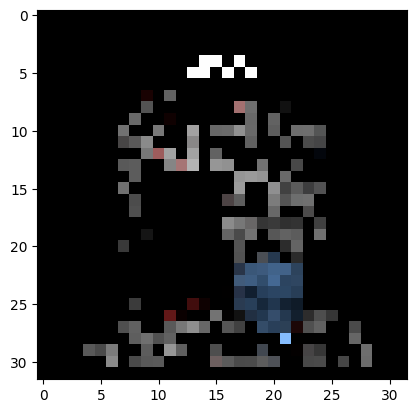

In [3]:
import logging
from matplotlib import pyplot as plt
logging.basicConfig(level=logging.CRITICAL)

img = scene.render(samples_per_pixel=1, progress_bar=True)
plt.imshow(img)
plt.show()

In [ ]:
"""
Example of using the updated quantum ray tracing implementation with SightPy.
This demonstrates how to enable and configure quantum ray tracing with improved Qiskit integration.
"""
from sightpy import *
from sightpy.quantum import QTraceConfig, filter_qiskit_warnings

# Filter Qiskit warnings to avoid deprecation messages
filter_qiskit_warnings()

# Create a simple scene
def create_scene():
    # Create a scene with quantum ray tracing enabled
    scene = Scene(ambient_color=rgb(0.05, 0.05, 0.05), use_quantum_raytracing=True)
    
    # Configure quantum ray tracing with optimized settings
    quantum_config = QTraceConfig(
        use_image_coherence=True,
        use_termination_criterion=True,
        max_iterations=3,
        shots_per_search=1024,
        debug=False,  # Set to True for detailed logging
        optimization_level=2  # Qiskit optimization level (0-3)
    )
    scene.enable_quantum_raytracing(quantum_config)
    
    # Add a camera
    scene.add_Camera(
        screen_width=64,  # Keep resolution small for faster rendering with quantum
        screen_height=64,
        look_from=vec3(278, 278, 800),
        look_at=vec3(278, 278, 0),
        focal_distance=1.,
        field_of_view=40
    )
    
    # Add materials
    green_diffuse = Diffuse(diff_color=rgb(.12, .45, .15))
    red_diffuse = Diffuse(diff_color=rgb(.65, .05, .05))
    white_diffuse = Diffuse(diff_color=rgb(.73, .73, .73))
    emissive_white = Emissive(color=rgb(15., 15., 15.))
    blue_glass = Refractive(n=vec3(1.5 + 0.05e-8j, 1.5 + 0.02e-8j, 1.5 + 0.j))
    
    # Add light (emissive plane)
    scene.add(Plane(
        material=emissive_white,
        center=vec3(213 + 130/2, 554, -227.0 - 105/2),
        width=130.0, height=105.0,
        u_axis=vec3(1.0, 0.0, 0),
        v_axis=vec3(0.0, 0, 1.0)
    ), importance_sampled=True)
    
    # Add room walls
    scene.add(Plane(
        material=white_diffuse,
        center=vec3(555/2, 555/2, -555.0),
        width=555.0, height=555.0,
        u_axis=vec3(0.0, 1.0, 0),
        v_axis=vec3(1.0, 0, 0.0)
    ))
    
    scene.add(Plane(
        material=green_diffuse,
        center=vec3(-0.0, 555/2, -555/2),
        width=555.0, height=555.0,
        u_axis=vec3(0.0, 1.0, 0),
        v_axis=vec3(0.0, 0, -1.0)
    ))
    
    scene.add(Plane(
        material=red_diffuse,
        center=vec3(555.0, 555/2, -555/2),
        width=555.0, height=555.0,
        u_axis=vec3(0.0, 1.0, 0),
        v_axis=vec3(0.0, 0, -1.0)
    ))
    
    scene.add(Plane(
        material=white_diffuse,
        center=vec3(555/2, 555, -555/2),
        width=555.0, height=555.0,
        u_axis=vec3(1.0, 0.0, 0),
        v_axis=vec3(0.0, 0, -1.0)
    ))
    
    scene.add(Plane(
        material=white_diffuse,
        center=vec3(555/2, 0., -555/2),
        width=555.0, height=555.0,
        u_axis=vec3(1.0, 0.0, 0),
        v_axis=vec3(0.0, 0, -1.0)
    ))
    
    # Add a box
    box = Cuboid(
        material=white_diffuse,
        center=vec3(182.5, 165, -285-160/2),
        width=165, height=165*2, length=165,
        shadow=False
    )
    box.rotate(θ=15, u=vec3(0, 1, 0))
    scene.add(box)
    
    # Add a glass sphere
    scene.add(Sphere(
        material=blue_glass,
        center=vec3(370.5, 165/2, -65-185/2),
        radius=165/2,
        shadow=False,
        max_ray_depth=3
    ), importance_sampled=True)
    
    return scene

def render_comparison():
    """Render the scene with both classical and quantum ray tracing for comparison."""
    import time
    
    print("Creating scene...")
    scene = create_scene()
    
    # First render with quantum ray tracing
    print("\nRendering with quantum ray tracing...")
    start_time = time.time()
    
    # Use low samples for testing quantum rendering
    quantum_img = scene.render(samples_per_pixel=2, progress_bar=True)
    quantum_time = time.time() - start_time
    quantum_img.save("quantum_render.png")
    
    print(f"Quantum rendering completed in {quantum_time:.2f} seconds")
    
    # Then render with classical ray tracing
    print("\nRendering with classical ray tracing for comparison...")
    scene.disable_quantum_raytracing()
    start_time = time.time()
    
    # Use same sample count for fair comparison
    classical_img = scene.render(samples_per_pixel=2, progress_bar=True)
    classical_time = time.time() - start_time
    classical_img.save("classical_render.png")
    
    print(f"Classical rendering completed in {classical_time:.2f} seconds")
    
    # Print comparison
    print("\nRendering Comparison:")
    print(f"Quantum:   {quantum_time:.2f} seconds")
    print(f"Classical: {classical_time:.2f} seconds")
    print(f"Speedup:   {classical_time / quantum_time:.2f}x")
    
    print("\nImages saved as quantum_render.png and classical_render.png")
    
    # Try to display the images if running in a notebook or interactive environment
    try:
        print("\nDisplaying quantum render:")
        quantum_img.show()
        print("\nDisplaying classical render:")
        classical_img.show()
    except:
        print("Could not display images interactively")

def analyze_quantum_scaling():
    """
    Analyze how quantum ray tracing scales with the number of primitives.
    This should show the O(√N) vs O(N) advantage.
    """
    import matplotlib.pyplot as plt
    import numpy as np
    
    # Create a list of primitive counts to test
    primitive_counts = [4, 8, 16, 32, 64]
    
    # Lists to store timing results
    quantum_times = []
    classical_times = []
    
    # Configure quantum ray tracing
    quantum_config = QTraceConfig(
        use_image_coherence=False,
        use_termination_criterion=True,
        max_iterations=2,
        shots_per_search=256,
        debug=False
    )
    
    for num_primitives in primitive_counts:
        print(f"\nTesting with {num_primitives} primitives...")
        
        # Create a scene with the specified number of primitives
        scene = Scene(ambient_color=rgb(0.05, 0.05, 0.05))
        
        # Add a camera with small resolution for faster testing
        scene.add_Camera(
            screen_width=32,
            screen_height=32,
            look_from=vec3(0, 0, 10),
            look_at=vec3(0, 0, 0)
        )
        
        # Create diffuse material
        diffuse = Diffuse(diff_color=rgb(0.8, 0.8, 0.8))
        
        # Add ground plane
        scene.add(Plane(
            material=diffuse,
            center=vec3(0, -5, 0),
            width=20, height=20,
            u_axis=vec3(1, 0, 0),
            v_axis=vec3(0, 0, 1)
        ))
        
        # Add the specified number of randomly positioned spheres
        np.random.seed(42)  # For reproducibility
        for i in range(num_primitives):
            x = np.random.uniform(-5, 5)
            y = np.random.uniform(-5, 5)
            z = np.random.uniform(-15, 0)
            
            r = np.random.uniform(0.2, 0.8)
            g = np.random.uniform(0.2, 0.8)
            b = np.random.uniform(0.2, 0.8)
            
            radius = np.random.uniform(0.3, 0.7)
            
            material = Diffuse(diff_color=rgb(r, g, b))
            scene.add(Sphere(
                material=material,
                center=vec3(x, y, z),
                radius=radius
            ))
        
        # Add a light
        scene.add_DirectionalLight(vec3(0, 1, 1).normalize(), rgb(1, 1, 1))
        
        # Time classical rendering
        import time
        start_time = time.time()
        scene.render(samples_per_pixel=1)
        classical_time = time.time() - start_time
        classical_times.append(classical_time)
        
        # Enable quantum ray tracing and time it
        scene.enable_quantum_raytracing(quantum_config)
        start_time = time.time()
        scene.render(samples_per_pixel=1)
        quantum_time = time.time() - start_time
        quantum_times.append(quantum_time)
        
        print(f"  Classical: {classical_time:.2f}s")
        print(f"  Quantum:   {quantum_time:.2f}s")
        print(f"  Ratio:     {classical_time / quantum_time:.2f}x")
    
    # Plot the results
    plt.figure(figsize=(10, 6))
    plt.plot(primitive_counts, classical_times, 'bo-', label='Classical O(N)')
    plt.plot(primitive_counts, quantum_times, 'ro-', label='Quantum O(√N)')
    plt.xlabel('Number of Primitives')
    plt.ylabel('Render Time (seconds)')
    plt.title('Classical vs Quantum Ray Tracing Scaling')
    plt.legend()
    plt.grid(True)
    plt.savefig('quantum_scaling.png')
    print("\nScaling analysis saved to quantum_scaling.png")
    
    # Try to show the plot
    try:
        plt.show()
    except:
        print("Could not display plot interactively")

if __name__ == "__main__":
    import sys
    
    # Check if Qiskit is available
    try:
        import qiskit
        print(f"Using Qiskit version {qiskit.__version__}")
    except ImportError:
        print("WARNING: Qiskit not found. Please install Qiskit to use quantum ray tracing:")
        print("pip install qiskit qiskit-aer")
        sys.exit(1)
    
    # Check which function to run
    if len(sys.argv) > 1 and sys.argv[1] == "scale":
        analyze_quantum_scaling()
    else:
        render_comparison()

INFO:qiskit.passmanager.base_tasks:Pass: ContainsInstruction - 0.01240 (ms)
INFO:qiskit.passmanager.base_tasks:Pass: InverseCancellation - 0.09298 (ms)
INFO:qiskit.passmanager.base_tasks:Pass: ContractIdleWiresInControlFlow - 0.00501 (ms)
INFO:qiskit.passmanager.base_tasks:Pass: UnitarySynthesis - 0.00882 (ms)
INFO:qiskit.passmanager.base_tasks:Pass: HighLevelSynthesis - 0.01502 (ms)
INFO:qiskit.passmanager.base_tasks:Pass: BasisTranslator - 0.09918 (ms)
INFO:qiskit.passmanager.base_tasks:Pass: Depth - 0.01216 (ms)
INFO:qiskit.passmanager.base_tasks:Pass: FixedPoint - 0.01073 (ms)
INFO:qiskit.passmanager.base_tasks:Pass: Size - 0.00739 (ms)
INFO:qiskit.passmanager.base_tasks:Pass: FixedPoint - 0.00763 (ms)
INFO:qiskit.passmanager.base_tasks:Pass: Optimize1qGatesDecomposition - 0.09584 (ms)
INFO:qiskit.passmanager.base_tasks:Pass: InverseCancellation - 0.05746 (ms)
INFO:qiskit.passmanager.base_tasks:Pass: ContractIdleWiresInControlFlow - 0.00405 (ms)
INFO:qiskit.passmanager.base_tasks:P

Using Qiskit version 2.0.0
Creating scene...
Quantum ray tracing enabled with Qiskit 2.0.0
Quantum instance created successfully

Rendering with quantum ray tracing...
Rendering...
Using quantum ray tracing
Scene contains 8 primitives
Quantum oracle depth: 8, width: 8
Shots per search: 1024


INFO:qiskit.passmanager.base_tasks:Pass: ContainsInstruction - 0.01216 (ms)
INFO:qiskit.passmanager.base_tasks:Pass: InverseCancellation - 0.12684 (ms)
INFO:qiskit.passmanager.base_tasks:Pass: ContractIdleWiresInControlFlow - 0.00930 (ms)
INFO:qiskit.passmanager.base_tasks:Pass: UnitarySynthesis - 0.01121 (ms)
INFO:qiskit.passmanager.base_tasks:Pass: HighLevelSynthesis - 0.02122 (ms)
INFO:qiskit.passmanager.base_tasks:Pass: BasisTranslator - 0.11969 (ms)
INFO:qiskit.passmanager.base_tasks:Pass: Depth - 0.01454 (ms)
INFO:qiskit.passmanager.base_tasks:Pass: FixedPoint - 0.00834 (ms)
INFO:qiskit.passmanager.base_tasks:Pass: Size - 0.00811 (ms)
INFO:qiskit.passmanager.base_tasks:Pass: FixedPoint - 0.01001 (ms)
INFO:qiskit.passmanager.base_tasks:Pass: Optimize1qGatesDecomposition - 0.14663 (ms)
INFO:qiskit.passmanager.base_tasks:Pass: InverseCancellation - 0.09179 (ms)
INFO:qiskit.passmanager.base_tasks:Pass: ContractIdleWiresInControlFlow - 0.00358 (ms)
INFO:qiskit.passmanager.base_tasks:P

TypeError: 'int' object is not subscriptable

Creating scene...
Quantum ray tracing enabled
Rendering with quantum ray tracing...
Rendering...
Using quantum ray tracing


100% |########################################################################|


Render Took 1090.7869284152985
Rendering with classical ray tracing for comparison...
Quantum ray tracing disabled
Rendering...


Render Took 0.9800872802734375
Displaying comparison plot...


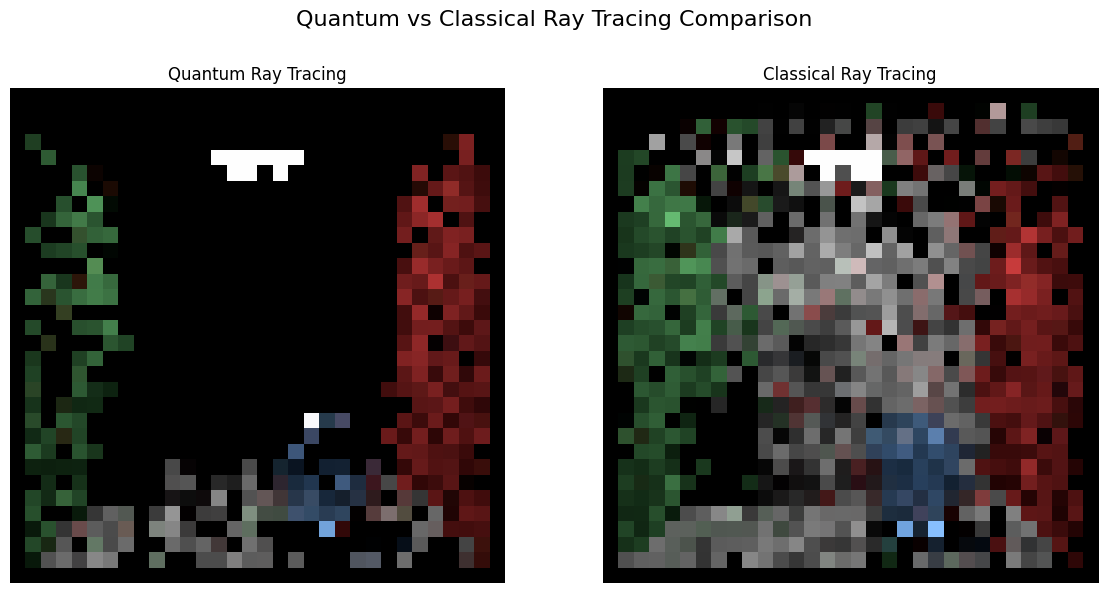

In [ ]:
"""
Example of quantum ray tracing with SightPy.
This demonstrates how to enable quantum ray tracing and configure it.
"""
from sightpy import *
from sightpy.quantum import QTraceConfig, filter_qiskit_warnings, patch_scene_class

filter_qiskit_warnings()
patch_scene_class()


# Create a simple scene
def create_scene():
    # Create a scene with quantum ray tracing enabled
    scene = Scene(ambient_color=rgb(0.05, 0.05, 0.05), use_quantum_raytracing=True)
    
    # Configure quantum ray tracing
    quantum_config = QTraceConfig(
        use_image_coherence=True,
        use_termination_criterion=True,
        max_iterations=1,
        shots_per_search=1024,
        debug=True  # Set to True for detailed logging
    )
    scene.enable_quantum_raytracing(quantum_config)
    
    # Add a camera
    scene.add_Camera(
        screen_width=32,
        screen_height=32,
        look_from = vec3(278, 278, 800),
        look_at = vec3(278,278,0), 
		focal_distance= 1.,
        field_of_view= 40
    )
    
    # Add materials
    green_diffuse = Diffuse(diff_color = rgb(.12, .45, .15))
    red_diffuse = Diffuse(diff_color = rgb(.65, .05, .05))
    white_diffuse = Diffuse(diff_color = rgb(.73, .73, .73))
    emissive_white = Emissive(color = rgb(15., 15., 15.))
    blue_glass = Refractive(n = vec3(1.5 + 0.05e-8j,1.5 +  0.02e-8j,1.5 +  0.j))
    
    # this is the light
    scene.add(Plane(material = emissive_white,  center = vec3(213 + 130/2, 554, -227.0 - 105/2), width = 130.0, height = 105.0, u_axis = vec3(1.0, 0.0, 0), v_axis = vec3(0.0, 0, 1.0)), 
                        importance_sampled = True)



    scene.add(Plane(material = white_diffuse,  center = vec3(555/2, 555/2, -555.0), width = 555.0,height = 555.0, u_axis = vec3(0.0, 1.0, 0), v_axis = vec3(1.0, 0, 0.0)))

    scene.add(Plane(material = green_diffuse,  center = vec3(-0.0, 555/2, -555/2), width = 555.0,height = 555.0,  u_axis = vec3(0.0, 1.0, 0), v_axis = vec3(0.0, 0, -1.0)))

    scene.add(Plane(material = red_diffuse,  center = vec3(555.0, 555/2, -555/2), width = 555.0,height = 555.0,  u_axis = vec3(0.0, 1.0, 0), v_axis = vec3(0.0, 0, -1.0)))

    scene.add(Plane(material = white_diffuse,  center = vec3(555/2, 555, -555/2), width = 555.0,height = 555.0,  u_axis = vec3(1.0, 0.0, 0), v_axis = vec3(0.0, 0, -1.0)))

    scene.add(Plane(material = white_diffuse,  center = vec3(555/2, 0., -555/2), width = 555.0,height = 555.0,  u_axis = vec3(1.0, 0.0, 0), v_axis = vec3(0.0, 0, -1.0)))


    cb = Cuboid( material = white_diffuse, center = vec3(182.5, 165, -285-160/2), width = 165,height = 165*2, length = 165, shadow = False)
    cb.rotate(θ = 15, u = vec3(0,1,0))
    scene.add(cb)

    scene.add(Sphere( material = blue_glass, center = vec3(370.5, 165/2, -65-185/2), radius = 165/2, shadow = False, max_ray_depth = 3),
                        importance_sampled = True)
    
    return scene

def main():
    import logging
    logging.basicConfig(level=logging.CRITICAL)
    
    print("Creating scene...")
    scene = create_scene()
    
    print("Rendering with quantum ray tracing...")
    # Render with low samples for testing
    img_quantum = scene.render(samples_per_pixel=1, progress_bar=True)
    
    # Compare with classical ray tracing
    print("Rendering with classical ray tracing for comparison...")
    scene.disable_quantum_raytracing()
    img_classical = scene.render(samples_per_pixel=1, progress_bar=True)
    
    plt.figure(figsize=(12, 6))
    
    plt.subplot(1, 2, 1)
    plt.imshow(img_quantum)
    plt.title("Quantum Ray Tracing")
    plt.axis('off')
    
    plt.subplot(1, 2, 2)
    plt.imshow(img_classical)
    plt.title("Classical Ray Tracing")
    plt.axis('off')
    
    plt.tight_layout()
    plt.suptitle("Quantum vs Classical Ray Tracing Comparison", fontsize=16)
    plt.subplots_adjust(top=0.85)
    
    print("Displaying comparison plot...")
    plt.show()

if __name__ == "__main__":
    main()